In [1]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd



In [2]:
#Import file
accident_csv = os.path.join('accidents-final.csv')

#Create dataframe
accident_df = pd.read_csv(accident_csv)

#View citydata dataframe
accident_df.head()

,Unnamed: 0,STATE,VE_FORMS,PERMVIT,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,...,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,CF1,CF2,CF3,FATALS,DRUNK_DR
0,0,Alabama,1,1,Hoover,1,1,2016,6,9,...,Outside Trafficway,Daylight,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1
1,1,Alabama,1,2,Hoover,10,1,2016,1,19,...,On Roadside,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1
2,2,Alabama,1,1,Jefferson,1,1,2016,6,2,...,On Roadside,Dark - Lighted,Cloudy,No Additional Atmospheric Conditions,Cloudy,None,None,None,1,0
3,3,Alabama,1,1,Jefferson,17,1,2016,1,21,...,On Median,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1
4,4,Alabama,1,1,Vestavia Hills,26,1,2016,3,20,...,Outside Trafficway,Dark - Lighted,Rain,No Additional Atmospheric Conditions,Rain,None,None,None,1,0


In [3]:
# Count distribution of lighting conditions
lighting = accident_df["LGT_COND"].value_counts()
lighting

Daylight                   16336
Dark - Not Lighted          9494
Dark - Lighted              6732
Dusk                         803
Dawn                         595
Dark - Unknown Lighting      262
Unknown                      188
Not Reported                  15
Other                         14
Name: LGT_COND, dtype: int64

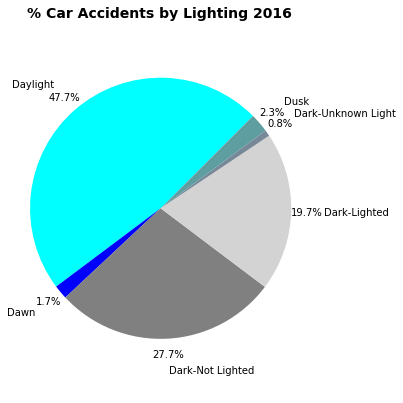

In [12]:
# Labels for the sections of our pie chart
labels = ["Daylight", "Dawn", "Dark-Not Lighted", "Dark-Lighted", "Dark-Unknown Light", "Dusk"]
fig = plt.figure(figsize=[6, 6])

# The values of each section of the pie chart
sizes = [16336, 595, 9494, 6732, 262, 803]

# The colors of each section of the pie chart
colors = ["aqua", "blue", "grey", "lightgrey", "lightslategrey", "cadetblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", pctdistance=1.12, labeldistance=1.25, startangle = 45)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal", fontsize = 14, fontweight = 'bold')
plt.title('% Car Accidents by Lighting 2016', fontsize=14, fontweight = 'bold')

# Save an image of the chart and print it to the screen
plt.tight_layout(rect=[0.03, 0.05, 0.77, 1])
plt.savefig("%caraccidentsbylighting2016.png")
plt.show()


In [5]:
# Create the GroupBy object based on the "LGT_COND" column
lighting_group = accident_df.groupby(["LGT_COND"], as_index=False)

# Calculate average fatalities 
average_drunk_drivers = lighting_group.mean()

# Create dataframe
average_drunk_drivers_df = pd.DataFrame(average_drunk_drivers)

average_drunk_drivers_df

,LGT_COND,Unnamed: 0,VE_FORMS,PERMVIT,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,FATALS,DRUNK_DR
0,Dark - Lighted,16073.602644,1.418152,2.082739,15.751634,6.768865,2016.0,4.171420,12.836156,28.886512,1.071598,0.356803
1,Dark - Not Lighted,17771.715505,1.354540,2.014009,15.739941,6.904255,2016.0,4.190541,13.219718,28.853170,1.099115,0.386455
2,Dark - Unknown Lighting,14307.580153,1.332061,1.809160,15.992366,7.072519,2016.0,4.087786,14.068702,29.270992,1.049618,0.354962
3,Dawn,16447.803361,1.490756,2.040336,15.174790,6.857143,2016.0,3.808403,6.245378,28.789916,1.089076,0.146218
4,Daylight,17547.695458,1.659158,2.486349,15.787831,6.616001,2016.0,4.098861,13.404138,29.059072,1.088761,0.147160
5,Dusk,15964.293898,1.546700,2.315068,15.907846,6.996264,2016.0,4.184309,18.734745,29.008717,1.089664,0.305106
6,Not Reported,17269.466667,1.133333,1.600000,15.400000,6.800000,2016.0,4.733333,13.266667,26.666667,1.000000,0.400000
7,Other,21952.714286,1.214286,1.500000,12.857143,7.142857,2016.0,4.214286,11.142857,37.785714,1.000000,0.142857
8,Unknown,13261.122340,1.106383,1.388298,14.601064,7.218085,2016.0,3.941489,42.356383,51.218085,1.058511,0.324468


In [6]:
average_drunk_drivers_df.drop(['Unnamed: 0', 'VE_FORMS', 'PERMVIT', 'DAY','MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE'], axis=1, inplace=True)

average_drunk_drivers_df

,LGT_COND,FATALS,DRUNK_DR
0,Dark - Lighted,1.071598,0.356803
1,Dark - Not Lighted,1.099115,0.386455
2,Dark - Unknown Lighting,1.049618,0.354962
3,Dawn,1.089076,0.146218
4,Daylight,1.088761,0.147160
5,Dusk,1.089664,0.305106
6,Not Reported,1.000000,0.400000
7,Other,1.000000,0.142857
8,Unknown,1.058511,0.324468


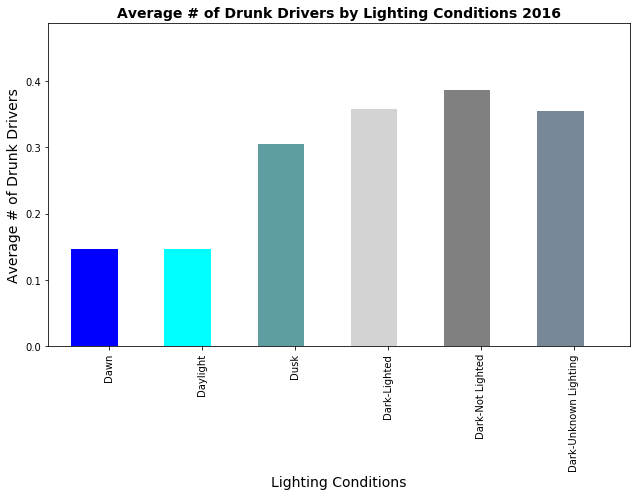

In [7]:
lighting = ["Dawn", "Daylight", "Dusk", "Dark-Lighted", "Dark-Not Lighted", "Dark-Unknown Lighting"]#, "Not Reported", "Other", "Unknown"]
drunk_drivers = [0.146218, 0.147160, 0.305106, 0.356803, 0.386455, 0.354962]#, 0.400000, 0.142857, 0.324468]
x_axis = np.arange(len(drunk_drivers))
colors = colors = ["blue", "aqua", "cadetblue", "lightgrey", "grey", "lightslategrey"]
plt.figure(figsize=(9,7))

# Create a bar chart based upon the above data
plt.bar(x_axis, drunk_drivers, color = colors, align="edge", width = 0.5)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, lighting, rotation='vertical')

# Set the limits of the x axis
plt.xlim(-0.25, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, max(drunk_drivers)+0.1)

# Give the chart a title, x label, and y label
plt.title("Average # of Drunk Drivers by Lighting Conditions 2016", fontsize=14, fontweight="bold")
plt.xlabel("Lighting Conditions", fontsize=14)
plt.ylabel("Average # of Drunk Drivers", fontsize=14)

# Save an image of the chart and print it to the screen
plt.tight_layout()
plt.savefig("lightingand#drunkofdrivers2016.png")
plt.show()